# Clustering

: Gather clusters in dataset based on each data points' feature  
  In the same cluster >> The more similarity, the better.  
  In different clusters >> The less similarity, the better.  
  
* What is the difference between Classification and Clustering?  
  - Classification: You already know the number of class and each data points' class.
                    So, the problem is to guess the class of new data. 
                    >> "Supervised Learning"
  - Clustering: You don't have any information about class of the dataset.
                So, the problem is to predict the optimal division of data points.
                >> "Unsupervised Learning"

In [19]:
from pathlib import Path 
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

## Load Datasets

In [3]:
root = Path().parent.absolute()
fruits = pd.read_table(f"{root}/fruit_data_with_colors.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
X_fruits = np.asarray(fruits[['mass','width','height', 'color_score']])
y_fruits = np.asarray(fruits[['fruit_label']] - 1)

In [17]:
# Visualisation function
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    n_labels = len(class_labels)
    
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, n_labels + 1, 1), ncolors=n_labels)
    plt.figure()
    
    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold,
                norm=bnorm, alpha=0.40, edgecolors='black', lw=1)
    
    plt.xlim(X_min, X_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, n_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))

In [22]:
# Test with various shaped datasets
from sklearn import cluster, datasets

n_samples = 1500
noisy_circles,circle_labels = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, noise=.1)
noisy_moons=np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

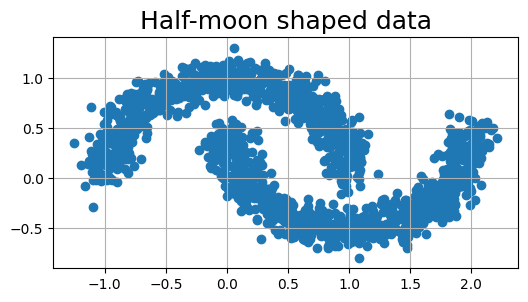

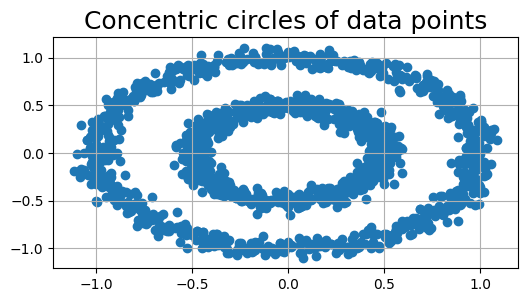

In [26]:
plt.figure(figsize=(6, 3))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
plt.show()

plt.figure(figsize=(6, 3))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])
plt.show()

## K-means Clustering

: Partitioning clustering method  

* To find out the partitions minimizing the SSE(Sum of Squared Errors)  
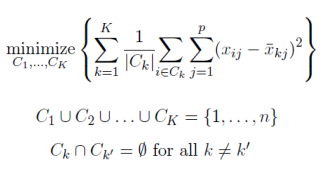  
(https://www.statlearning.com/resources-second-edition)  
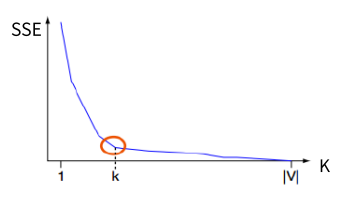  
(https://www.statlearning.com/resources-second-edition)

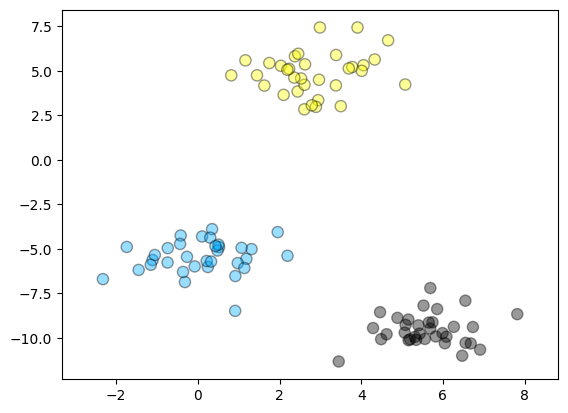

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3']);

In [31]:
# Test with various shaped datasets

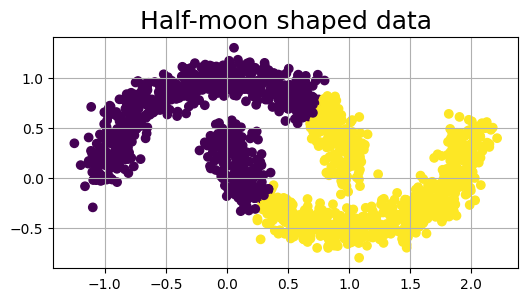

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(noisy_moons)

plt.figure(figsize=(6, 3))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=kmeans.labels_)
plt.show()

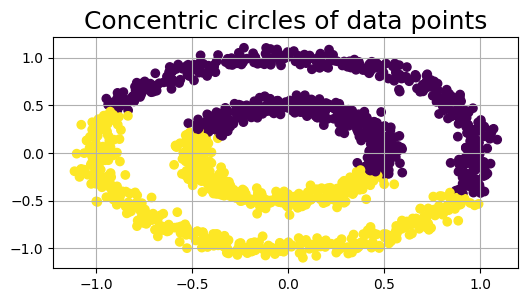

In [29]:
kmeans.fit(noisy_circles)

plt.figure(figsize=(6, 3))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=kmeans.labels_)
plt.show()

## Agglomerative Clustering

: Hierachical clustering method creating a dendrogram  

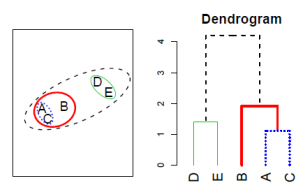  
(https://www.statlearning.com/resources-second-edition)
* Many linkages depending on the distance calculation methods  
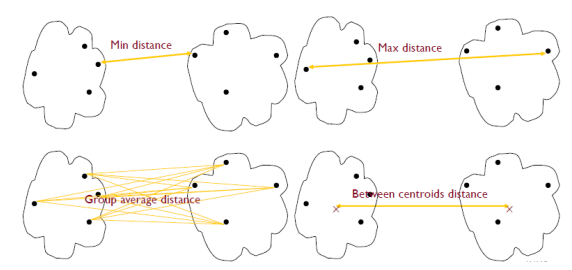   
(https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis/pdf)  
  * Min distance - single linkage
  * Max distance - complete linkage
  * Average distance
  * Centroids distance  
  
* BUT, Once you make wrong cluster, you can undo it.
* Computational complexity in time and space.
* There are different pros and cons depending on the linkage types.

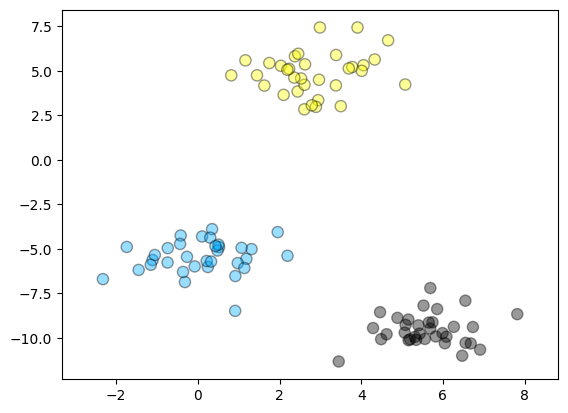

In [30]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

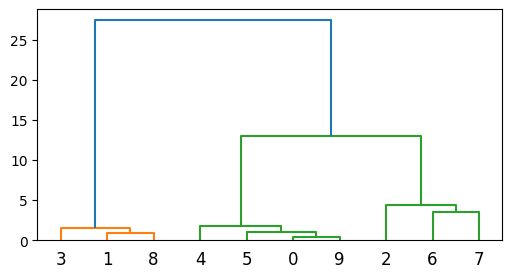

In [35]:
# Creating a dendrogram (using scipy)
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure(figsize=(6, 3))
dendrogram(ward(X))
plt.show()

In [32]:
# Test with various shaped datasets

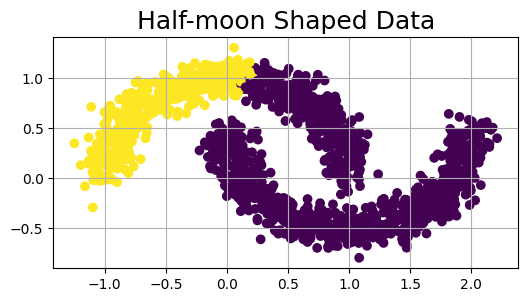

In [39]:
cls = AgglomerativeClustering(n_clusters = 2)
cls.fit(noisy_moons)

plt.figure(figsize=(6, 3))
plt.title("Half-moon Shaped Data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=cls.labels_)
plt.show()

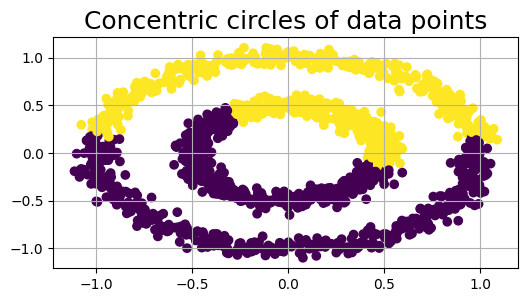

In [40]:
cls.fit(noisy_circles)

plt.figure(figsize=(6, 3))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=cls.labels_)
plt.show()

## DBSCAN Clustering

: Density-based Clustering  
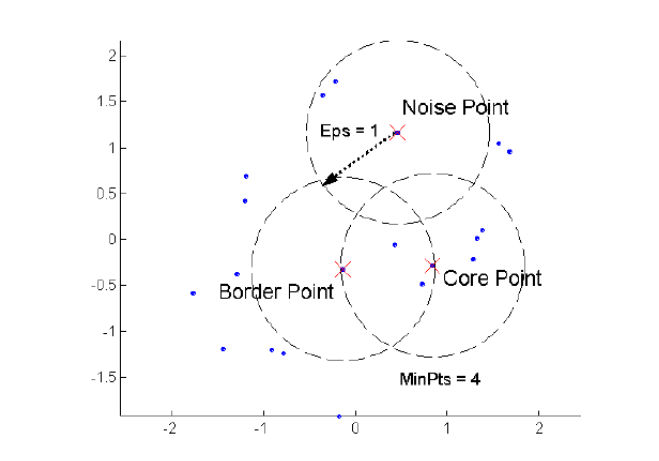
(https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis/pdf)  
* Density at a data point X
* Dense region
* Neighborhood
* Core point
* Border point
* Noise point

**[PROCESS]**
1. Label each data points with one of core, border, and noise.
2. Eliminate the noise data points.
3. Repeat it to every core points X not assigned to any cluster yet.  
   : Assign a new cluster to the point X and every points density-connected with point X.  
4. Assign the border points to a cluster of the closest core point of each border points.

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


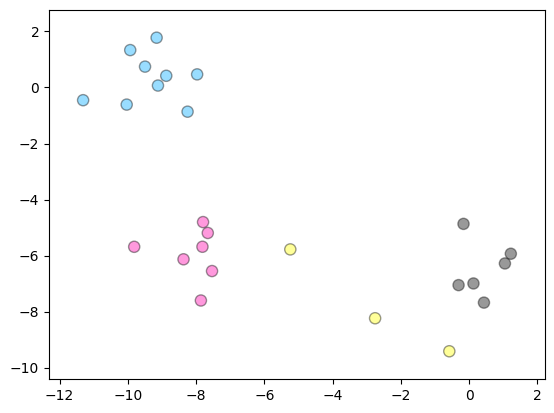

In [41]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

In [42]:
# Test with various shaped datasets

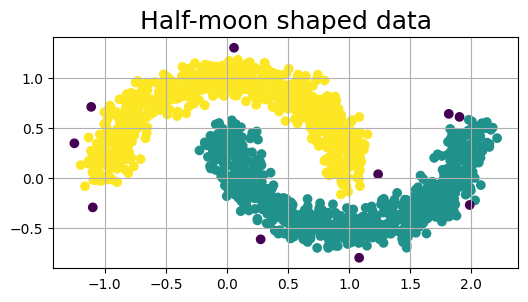

In [44]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(noisy_moons)

plt.figure(figsize=(6, 3))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=dbscan.labels_)
plt.show()

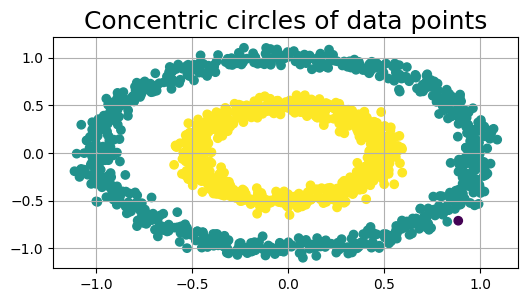

In [45]:
dbscan.fit(noisy_circles)

plt.figure(figsize=(6, 3))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=dbscan.labels_)
plt.show()